## Examining the integrating sphere's possible contamination
#### Noah McNeal, David Jaffe

On 12 June 2017, the WbLS group used UV-Visible Spectrophotometer for the first time since September 2016. A cuvette was found inside the integrating sphere (IS). A note left at the base of the sphere indicated that the cuvette had originally contained 3.14 g/L PPO in ETOH, indicating the the ethanol had long since evaporated. Upon further inspection, it was found that the cuvette cap had a white, powdery crust on top of it and along the edges where it met the glass. This discovery was concerning, as it raised the possibility that the inner Spectralon surface of the IS had been contaminated with PPO. In order to test this open question, we looked at emission scans of the empty sphere and compared them to Emission scans taken by Henry from the summer of 2016.

This notebook relies on the PTIData class to read in the UV-Vis data files and plot them. The code for this module was originally written by Lindsey, but has been adapted by Noah to make better use of scientific modules such as Pandas. All other modules used are either native to Python or are standard scientific packages. 

In [281]:
import copy
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import rootpy
import scipy

import PTI.ReadDataFiles
reload(PTI.ReadDataFiles)
from PTI.ReadDataFiles import PTIData

We begin by importing the data that we need. Data from the "Henry" folder was taken from David's Github repository and data from the "Noah" folder was taken in June 2017. Its location online has yet to  be determined. We first create the list of files to read in. Then, we take in the data using instances of the modified PTIData class. The most important features is that the raw data is stored as a Pandas Dataframe with one column named "wavelengths" and the other "intensity". The corrected data is similiarly stored in the class. 

In [323]:
noah_path_prefix = "Noah/Integrating Sphere Tests for PPO Contamination/"
henry_path_prefix = "Henry/Sphere/PPO_ETOH/"

file_paths = [noah_path_prefix+"EmissionScan_IS_Empty_em310_ex300-650_0x5nm_2sec_20170614_1659.txt",
              noah_path_prefix+"EmissionScan_NoCuvette_300_290-450_0x5nm_2sec_IS_20170613_1113.txt",
              noah_path_prefix+"EmissionScan_NoCuvette_300_290-450_0x5nm_2sec_IS_20170613_1158_OUTSLIT_WIDTH_HALVED.txt",
              noah_path_prefix+"EmissionScan_NoCuvette_300_290-450_0x5nm_5sec_IS_20170613_1409_OUTSLIT_WIDTH_HALVED.txt",
             ]
for i in range(310,340+1,10):
    file_paths.append(henry_path_prefix + "EmissionScan_0x31gperL_PPOinETOH_ex%d_2sec_160831.txt" %i)

for i in range(310,340+1,10):
        file_paths.append(henry_path_prefix + "EmissionScan_3x14gperL_PPOinETOH_ex%d_2sec_160831.txt" %i)
file_paths.append(henry_path_prefix + "EmissionScan_3x14gperL_PPOinETOH_ex335_2sec_160901.txt")
file_paths.append(henry_path_prefix + "EmissionScan_ETOH_ex310_2sec_160830.txt")


'''Reading in Data'''
# Tests from the IS for comparison
IS_em310_ex300650_2sec = PTIData(file_paths[0]) 
IS_em300_ex290450_2sec = PTIData(file_paths[1])
IS_em300_ex290450_2sec_small_slit = PTIData(file_paths[2])
IS_em300_ex290450_5sec_small_slit = PTIData(file_paths[3])


#Data from Henry at 0.31 g/L
IS_PPOETOH_ex310_0x31 = PTIData(file_paths[4])
IS_PPOETOH_ex320_0x31 = PTIData(file_paths[5])
IS_PPOETOH_ex330_0x31 = PTIData(file_paths[6])
IS_PPOETOH_ex340_0x31 = PTIData(file_paths[7])

# Data from Henry at 3.14 g/L
IS_PPOETOH_ex310_3x14 = PTIData(file_paths[8])
IS_PPOETOH_ex320_3x14 = PTIData(file_paths[9])
IS_PPOETOH_ex330_3x14 = PTIData(file_paths[10])
IS_PPOETOH_ex335_3x14 = PTIData(file_paths[12])
IS_PPOETOH_ex340_3x14 = PTIData(file_paths[11])

# Pure ethanol
IS_ETOH_ex310 = PTIData(file_paths[13])

We begin with an emission scan taken for the *empty* IS on 13 June 2017. This scan had:
* Excitation at 300 nm
* Range from 290 to 450 nm
* Step size of 0.5 nm
* Integration over 5 sec
* Output slit width halved to 0.5 mm

This one scan will be compared to emission scans from two concentrations of PPO in ethanol: 0.31 g/L and 3.14 g/L. These concentrations have multiple scans that differ in their excitation wavelengths, from 310 to 340 nm. Additionally, they were all taken with a normal output slit width, step size 0.5 nm, and integration time of 2 sec.

The empty IS scan data was vertically shifted before plotting. To do this, I took the intensity at 300 nm (the first data point) and multiplied it by 1.1. I then subtracted this value to every point in the spectrum to get the vertical shift. This method is admittedly rough. The selection of the 1.1 value was chosen by trial and error until I matched up the tail (~425-450 nm) of the empty IS spectrum with the tails of the other 9 spectra taken by Henry. 

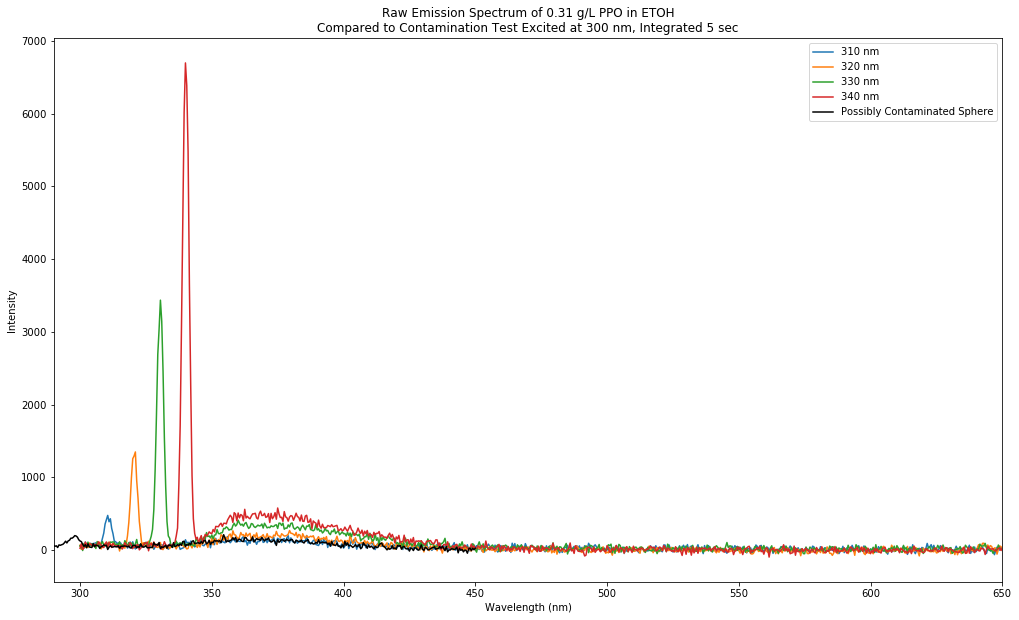

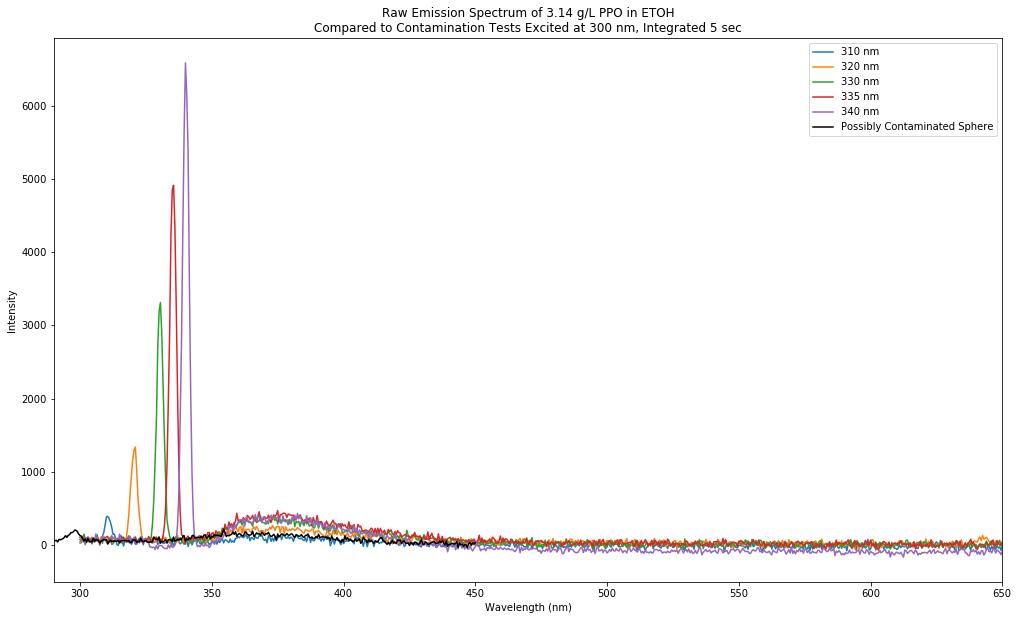

In [328]:
'''Plotting comparisons with last years data'''
# Shift the base line for the contamination tests with a rough estimate based on visual trial and error 
IS_em300_ex290450_5sec_small_slit.raw_data['intensity'] -= 1.1*IS_em300_ex290450_5sec_small_slit.raw_data['intensity'][0]


# Plotting the comparison to 0.31 g/L
fig1,axes1 = plt.subplots(figsize=(17,10), nrows=1, ncols=1)

IS_PPOETOH_ex310_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex320_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex330_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex340_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_em300_ex290450_5sec_small_slit.raw_data.plot(x="wavelength", ax=axes1,color='k')

axes1.set_title("Raw Emission Spectrum of 0.31 g/L PPO in ETOH\nCompared to Contamination Test Excited at 300 nm, Integrated 5 sec")
axes1.set_ylabel("Intensity")
axes1.legend(["310 nm", "320 nm", "330 nm", "340 nm", "Possibly Contaminated Sphere"])
axes1.set_xlabel("Wavelength (nm)")
plt.show()

#Plotting  the comparison to 3.14 g/L
fig2,axes2 = plt.subplots(figsize=(17,10), nrows=1, ncols=1)

IS_PPOETOH_ex310_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex320_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex330_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex335_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex340_3x14.raw_data.plot(x="wavelength",ax=axes2)
IS_em300_ex290450_5sec_small_slit.raw_data.plot(x="wavelength", ax=axes2,color='k')

axes2.set_title("Raw Emission Spectrum of 3.14 g/L PPO in ETOH\nCompared to Contamination Tests Excited at 300 nm, Integrated 5 sec")
axes2.set_xlabel("Wavelength (nm)")
axes2.set_ylabel("Intensity")
axes2.legend(["310 nm", "320 nm", "330 nm", "335 nm", "340 nm", "Possibly Contaminated Sphere"])
plt.show()

The input light spectrum is clearly seen at the shorter wavelengths as we expect. The most striking feature of the graphs is the indication of emission by the integrating sphere. In both figures, we see that the black curves are not flat between the range of about 340 to 425 nm. We would expect only noise in this region because the IS contained no sample, not even an empty cuvette. Nevertheless, the shape of the emission spectrum of the empty sphere is consistent with the spectra that we see for both small and large concentrations of PPO in ETOH. 

The fact that the sperum also aligns with the 0.31 g/L @ 310 nm excitation would be a coincidence due to the vertical shift that I performed on the empty IS data for more clear comparisons. To explore this similarity further, I plotted the empty IS sphere data with the data taken for PPO in ETOH excited at 310 nm. Because Henry did not take data at 300 nm, the 310 nm data sets are those with the more similar excitation wavelength. The plot below compares the empty sphere with both concentrations. 

**NOTE**: The next cell is meant to be run after the above code so that the empty IS data is shifted. If the code below is run without the preceding cell being run in the same session, the only consequence will be that the data is unshifted. 

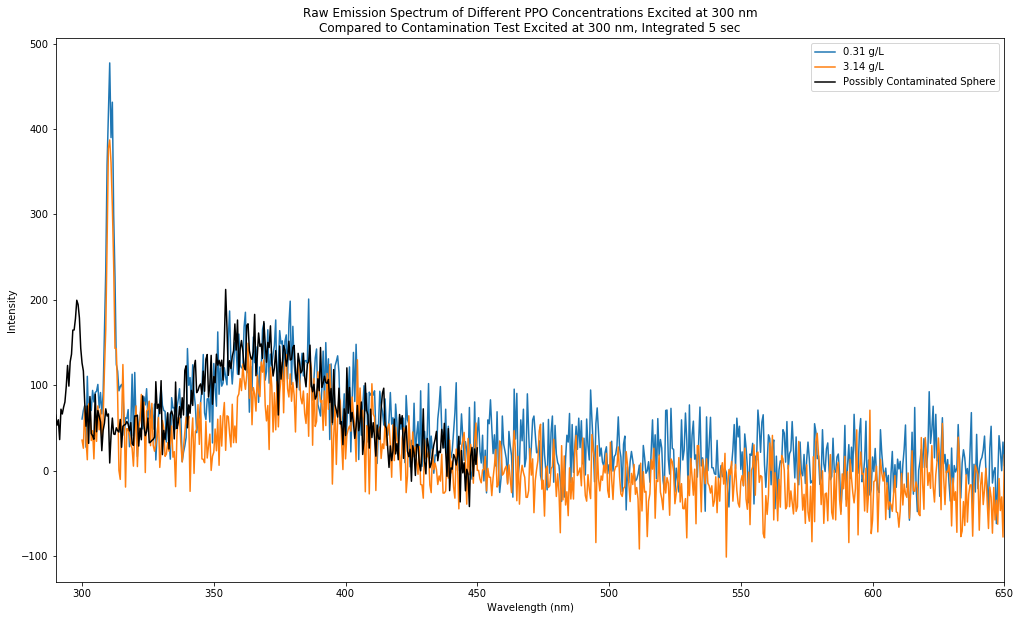

In [329]:
# Plotting the test with the 310 nm excitation for both 0.31 and 3.14 g/L
fig3,axes3 = plt.subplots(figsize=(17,10), nrows=1, ncols=1)
IS_PPOETOH_ex310_0x31.raw_data.plot(x="wavelength",ax=axes3)
IS_PPOETOH_ex310_3x14.raw_data.plot(x="wavelength",ax=axes3)
IS_em300_ex290450_5sec_small_slit.raw_data.plot(x="wavelength", ax=axes3,color='k')
axes3.set_title("Raw Emission Spectrum of Different PPO Concentrations Excited at 300 nm\nCompared to Contamination Test Excited at 300 nm, Integrated 5 sec")
axes3.set_xlabel("Wavelength (nm)")
axes3.set_ylabel("Intensity")
axes3.legend(["0.31 g/L", "3.14 g/L", "Possibly Contaminated Sphere"])
plt.show()

With this closer look at our comparisons, the similarities between the 0.31 g/L emission and that of the empty sphere are more striking. The 3.14 g/L scan is expected to differ because the larger concentration of fluorophote yields greater re-absorption of emitted light. Taking this into account, the three scans support the hypothesis that the IS has in some way been contaminated by PPO. 

These initial comparisons have been limited because the parameters of the empty IS scan were different that those that Henry used. In particular, we note differences in the
* Excitation wavelength
* Range of the emission wavelength scan
* Integration time
* Slit width of the outgoing light

To provide a more direct comparison, we decided to run another emission scan for the empty IS under the exact parameters used by Henry. Additionally, I changed my method of shifting the data set. Because the tail of the spectrum was longer, I was able to get an average of the points between 500 nm and 600 nm. This was taken as an estimate for the signal's pedestal and was then subtracted from each point in order to shift the empty IS spectrum. This procedure was not repeated for the PPO in ETOH spectra.

Finally, we have included a measuremen of pure ethanol excited at 310 nm taken by Henry so that we may compare the empty IS to a comparable solvent-only scan from 2016.

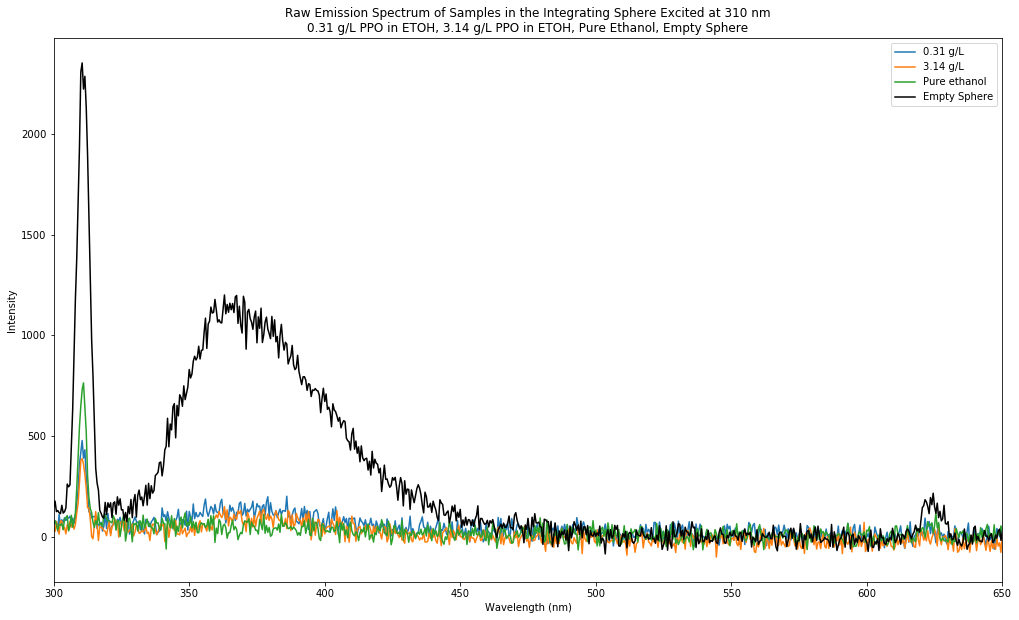

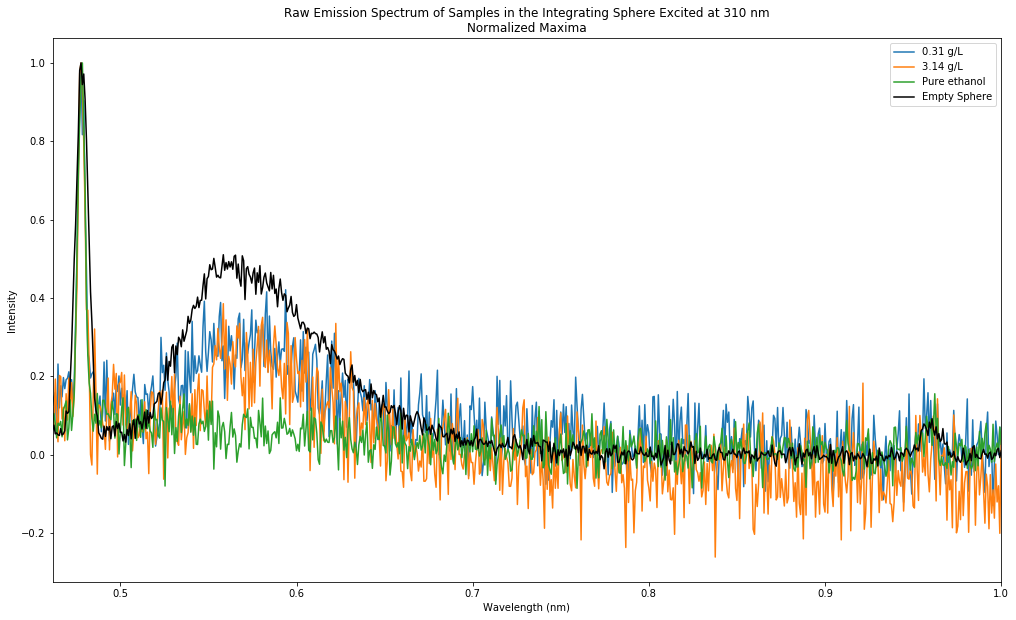

In [327]:

## Shifting the spectrum
# Create a copy to leave the original data unchanged
empty_sphere_data = copy.deepcopy(IS_em310_ex300650_2sec)

# Isolate the spectrum between the 500 nm and 600 nm wavelengths
limited_wavelengths = empty_sphere_data .raw_data.where((empty_sphere_data .raw_data['wavelength'] > 500) &
                                                        (empty_sphere_data .raw_data['wavelength'] < 600))

# Average the target data to estimate the baseline and apply the shift
empty_sphere_pedestal = np.mean(limited_wavelengths['intensity'])
empty_sphere_data.raw_data['intensity'] -= empty_sphere_pedestal*np.ones(empty_sphere_data.num_samples)

## Plotting the data
fig, axes1 = plt.subplots(figsize=(17,10), nrows = 1, ncols=1)
IS_PPOETOH_ex310_0x31.raw_data.plot(x="wavelength",ax=axes1)
IS_PPOETOH_ex310_3x14.raw_data.plot(x="wavelength",ax=axes1)
IS_ETOH_ex310.raw_data.plot(x="wavelength",ax=axes1)
empty_sphere_data.raw_data.plot(x="wavelength", ax=axes1,color='k')

axes1.set_title("Raw Emission Spectrum of Samples in the Integrating Sphere Excited at 310 nm\n"+
                 "0.31 g/L PPO in ETOH, 3.14 g/L PPO in ETOH, Pure Ethanol, Empty Sphere")
axes1.set_xlabel("Wavelength (nm)")
axes1.set_ylabel("Intensity")
axes1.legend(["0.31 g/L", "3.14 g/L", "Pure ethanol", "Empty Sphere"])
plt.show()

## Transforming the data for a different analysis
# Make copies to transform so that the original data sets are unchanged.
empty_sphere_data_norm = copy.deepcopy(empty_sphere_data)
IS_PPOETOH_ex310_3x14_norm = copy.deepcopy(IS_PPOETOH_ex310_3x14)
IS_PPOETOH_ex310_0x31_norm = copy.deepcopy(IS_PPOETOH_ex310_0x31)
IS_ETOH_ex310_norm = copy.deepcopy(IS_ETOH_ex310)

# Normalize the peak of each spectrum so that it lies at 1 and all other points are stretched accordingly
IS_PPOETOH_ex310_0x31_norm.raw_data /= np.max(IS_PPOETOH_ex310_0x31_norm.raw_data)
IS_PPOETOH_ex310_3x14_norm.raw_data /= np.max(IS_PPOETOH_ex310_3x14_norm.raw_data)
empty_sphere_data_norm.raw_data /= np.max(empty_sphere_data_norm.raw_data)
IS_ETOH_ex310_norm.raw_data /= np.max(IS_ETOH_ex310_norm.raw_data)

# Standard plotting
fig, axes2 = plt.subplots(figsize=(17,10), nrows = 1, ncols=1)
IS_PPOETOH_ex310_0x31_norm.raw_data.plot(x="wavelength",ax=axes2)
IS_PPOETOH_ex310_3x14_norm.raw_data.plot(x="wavelength",ax=axes2)
IS_ETOH_ex310_norm.raw_data.plot(x="wavelength",ax=axes2)
empty_sphere_data_norm.raw_data.plot(x="wavelength", ax=axes2,color='k')

axes2.set_title("Raw Emission Spectrum of Samples in the Integrating Sphere Excited at 310 nm\n"+
                 "Normalized Maxima")
axes2.set_xlabel("Wavelength (nm)")
axes2.set_ylabel("Intensity")
axes2.legend(["0.31 g/L", "3.14 g/L", "Pure ethanol", "Empty Sphere"])
plt.show()

Comparing these four emission scans taken with the same parameters further indicates the contamination of the IS. 

The pure ethanol spectrum is what one would expect from a solvent only. Its spectrum at short wavelengths matches those of the other spectra as we expect. However, it is clear that the pure ETOH scan has no signs of emission. This contrasts with the other three spectra, whose shapes are all similiar. These observations are most noticable in the plot where the spectra have all been scaled down by the peak intensity. 

A curious feature of the spectra is the tertiary distribution centered at approximately 625 nm. It is more clearly seen in the scan of the empty IS. However, it does appear that all four samples display the same peak at this wavelength. As this right-most distribution peaks at about twice the excitation wavelength, the feature may not be related to emission at all. Rather its prescence in the pure ETOH emission scan supports relationship between the peak at ~625 nm and the excitation distribution centered at 310 nm.

As an additional analysis, we sought to understand the effects of changing the slit width. To do so, we used three scans that were taken on 13 June. 

Documentation of PPO in the UV-Vis lab indicated that its emission spectrum should have three maxima. From the plots above, it is clear that the empty IS emission spectrum does not display these features. However, we did not know whether this was due to the abscence of PPO in the sphere or simply the resolution of the spectrometer. Hence, we decreased the slit width to see if we could get empty IS emission scans with better resolution. When 2 s integration time did not suffice, we tried increasing the time to 5 seconds. A comparison of three difference corrected emisison scans is available below.

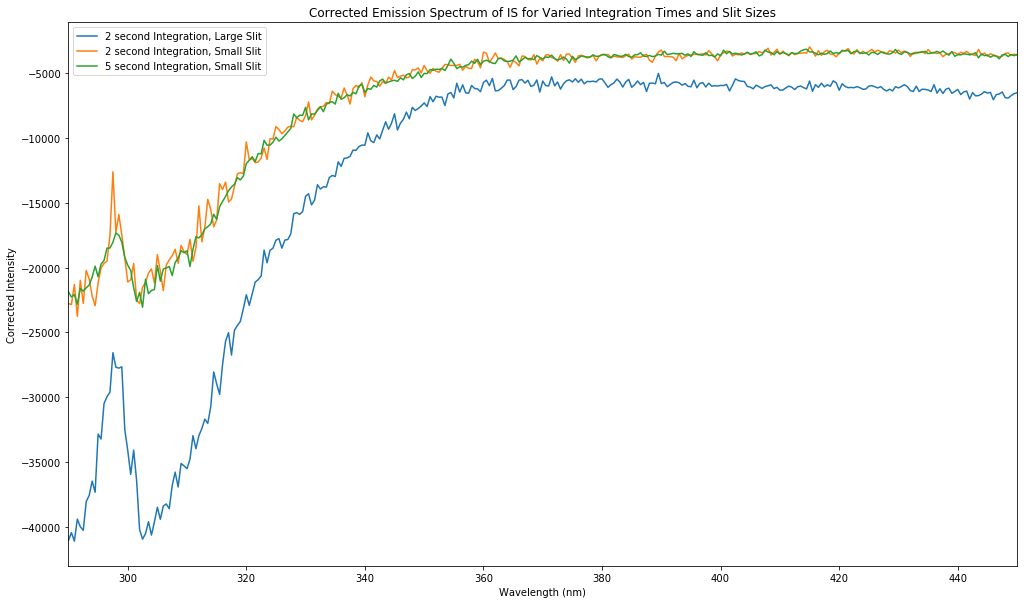

In [237]:
'''Comparing the slit sizes'''
fig, axes = plt.subplots(figsize=(17,10), nrows = 1, ncols=1)

IS_em300_ex290450_2sec.cor_data.plot(x="wavelength", ax=axes)
IS_em300_ex290450_2sec_small_slit.cor_data.plot(x="wavelength", ax=axes)

IS_em300_ex290450_5sec_small_slit.cor_data.plot(x="wavelength", ax=axes)
axes.set_title("Corrected Emission Spectrum of IS for Varied Integration Times and Slit Sizes")
axes.set_xlabel("Wavelength (nm)")
axes.set_ylabel("Corrected Intensity")
axes.legend(["2 second Integration, Large Slit", "2 second Integration, Small Slit","5 second Integration, Small Slit"])
plt.show()

The largest difference between the large slit spectrum and the smaller slit spectra appears is the difference in their relative amplitude, as all three curves have very similar shapes. One of the data sets did not have the raw data saved, so only the corrected data has been compared. Because these do not resemble regular emission spectra, it is difficult to assess whether a smaller output slit width allows better resolution of the the peaks. However, the resemblence of the corrected data suggests that no such improvements were made.

Furthermore, a longer integration time did not significantly affect the data, as the two small-slit spectra lie over each other. Although, the longer integration time has yielded a curve that looks smoother.

### Conclusions

What are we to do next?